# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [6]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Total Expenditure

How many years of data are logged in our dataset? 

In [8]:
print(len(df["YEAR"].unique()))

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [16]:
michigan = df[df["STATE"] == "MICHIGAN"]["TOTAL_EXPENDITURE"].mean()
ohio = df[df["STATE"] == "OHIO"]["TOTAL_EXPENDITURE"].mean()

print(ohio)
print(michigan)

17775446.24
17026245.84


Find the average for your outcome score across all states in 2019

In [17]:
df["TOTAL_EXPENDITURE"].mean()

9206242.121568628

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [19]:
states = df.groupby("STATE")
states["TOTAL_EXPENDITURE"].max()

STATE
ALABAMA                  7847387.0
ALASKA                   2968341.0
ARIZONA                  9581201.0
ARKANSAS                 5669431.0
CALIFORNIA              85320133.0
COLORADO                 9878524.0
CONNECTICUT             10826431.0
DELAWARE                 2041952.0
DISTRICT_OF_COLUMBIA     1360942.0
DODEA                          NaN
FLORIDA                 31219589.0
GEORGIA                 19172087.0
HAWAII                   2733094.0
IDAHO                    2100980.0
ILLINOIS                33037244.0
INDIANA                 11535287.0
IOWA                     6972412.0
KANSAS                   6175724.0
KENTUCKY                 7786281.0
LOUISIANA                8504567.0
MAINE                    2728535.0
MARYLAND                13992191.0
MASSACHUSETTS           17037880.0
MICHIGAN                20703780.0
MINNESOTA               12848946.0
MISSISSIPPI              4631356.0
MISSOURI                10719882.0
MONTANA                  1879789.0
NATIONAL      

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [20]:
df["PERCENTAGE_TOTAL_EXPENDITURE_SPENT_ON_INSTRUCTION"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]

Feature engineering justification: I want to analyze how much money of a states money is put toward education.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'School Enrollment in 100ks')

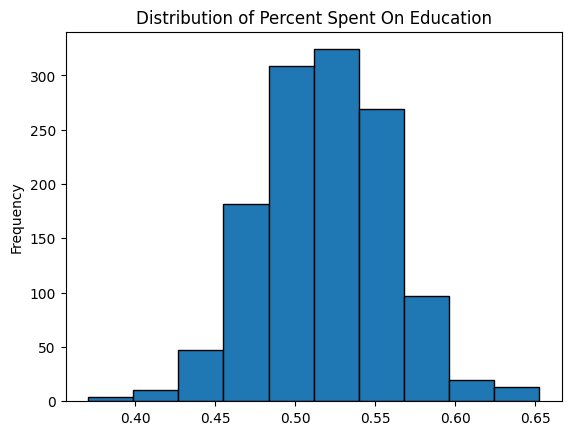

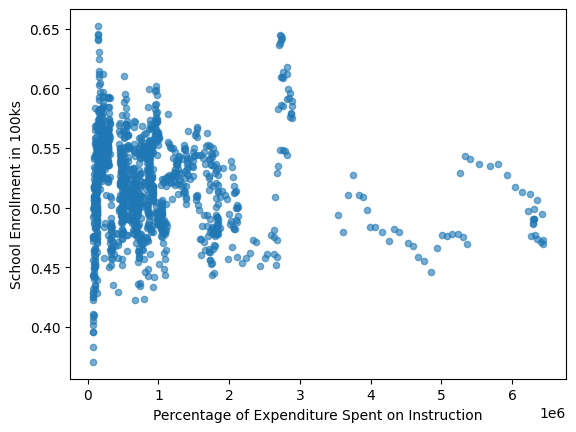

In [27]:
df.PERCENTAGE_TOTAL_EXPENDITURE_SPENT_ON_INSTRUCTION.plot.hist(title = "Distribution of Percent Spent On Education", edgecolor = "black")

df.plot.scatter(x='ENROLL_ALL', y='PERCENTAGE_TOTAL_EXPENDITURE_SPENT_ON_INSTRUCTION', alpha=0.6)
plt.xlabel('Percentage of Expenditure Spent on Instruction')
plt.ylabel('School Enrollment in 100ks')

1st: Distribution of Percent Spent on Education
2nd: Percentage of Expenditure Spent on Instruction vs School Enrollment

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Reading Score')

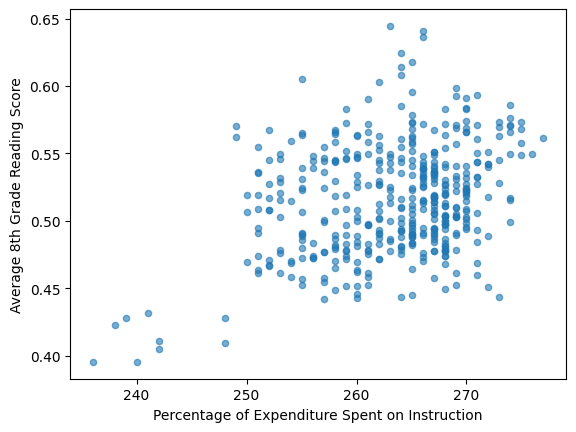

In [28]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='PERCENTAGE_TOTAL_EXPENDITURE_SPENT_ON_INSTRUCTION', alpha=0.6)
plt.xlabel('Percentage of Expenditure Spent on Instruction')
plt.ylabel('Average 8th Grade Reading Score')

3rd: Percentage of Expenditure Spent on Instruction vs Average 8th Grade Reading Score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[['AVG_READING_8_SCORE', 'ENROLL_ALL']].dropna()
y = df.loc[X.index]['PERCENTAGE_TOTAL_EXPENDITURE_SPENT_ON_INSTRUCTION']
y.fillna(y.median(), inplace=True)

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [32]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [33]:
# create your model here
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [36]:
model.score(X_test, y_test)

0.10821436288071085

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

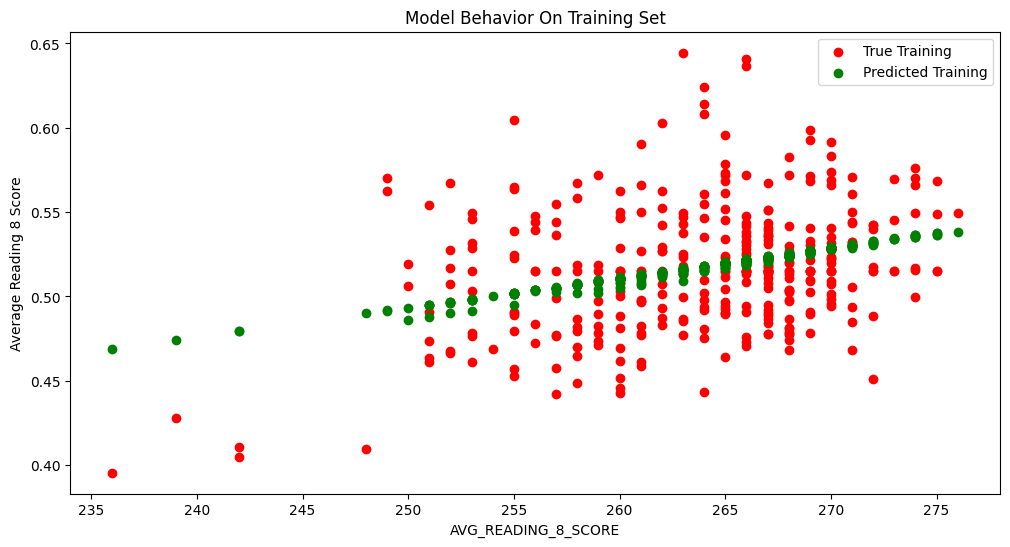

In [37]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Reading 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

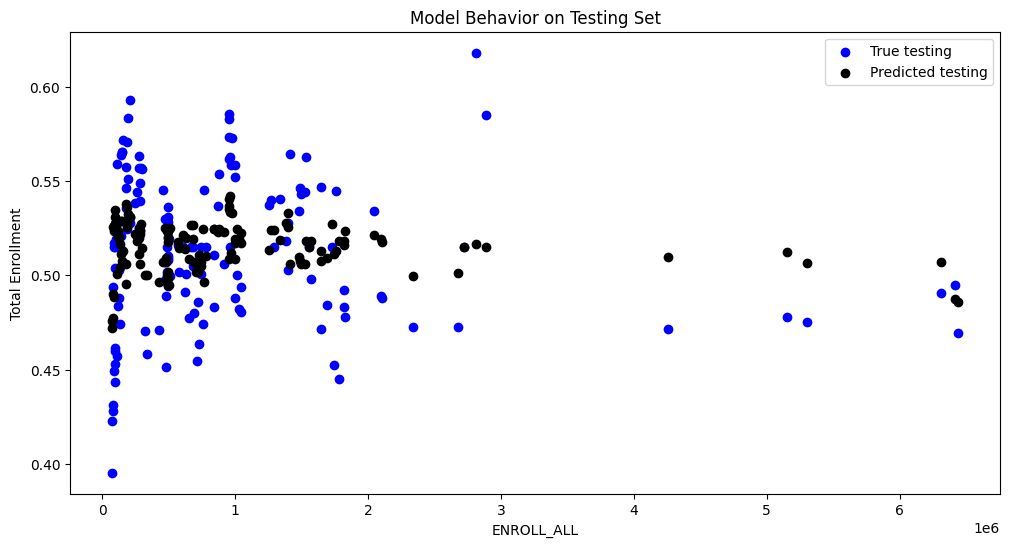

In [39]:
col_name = "ENROLL_ALL"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total Enrollment')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My work consisted of using the percentage of government funds spent on instruction put up against total enrollment and average 8th grade reading score, and used the values of both across all states to see if there is a correlation between government spending and enrollment or student performance. I used a Linear Regression model as my model to train the data given to me, and I discovered that there is not much correlation between reading scores and government spending. However, my machine learning model predicted the true values of enrollment quite well after training, depicting that there may be some correlation between total enrollment and percentage of goverment spending on education.